# Jet Thrust Spindown

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams["figure.figsize"]=10,8 #Set plot size
plt.rcParams.update({'font.size': 16}) #set plot size font
plt.rcParams.update({"axes.grid" : True, "grid.color": "lightgrey"}) #Add grid lines to plot

## Throttle Chop

In [14]:
DataPoints_x = [0.00,0.39,0.49,0.59,0.67,0.80,0.94,1.09,1.25,1.44,1.65,1.92,2.29,2.82,3.43,4.05,4.66,5.32,
                5.93,6.57,7.20,7.84,8.48,9.11,9.76,10.37,11.04,11.67,12]
DataPoints_y = [1.00,1.00,0.93,0.86,0.79,0.72,0.65,0.58,0.51,0.45,0.38,0.32,0.26,0.22,0.20,0.18,0.16,0.15,
                0.14,0.13,0.12,0.11,0.11,0.10,0.09,0.09,0.09,0.08,0.08]

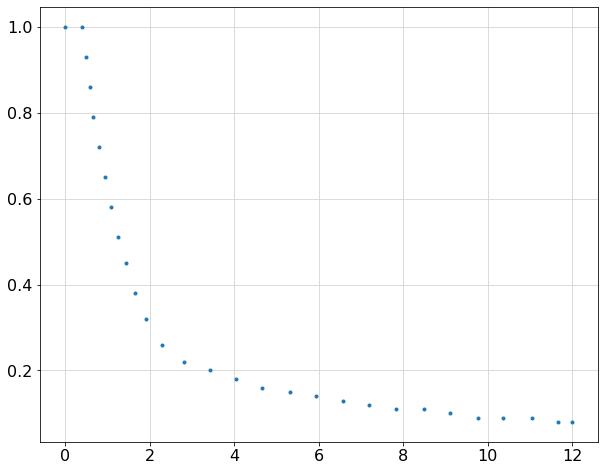

In [15]:
plt.plot(DataPoints_x,DataPoints_y,'.')

1.0483574824421393 0.6908687410364955 0.09705545463553855


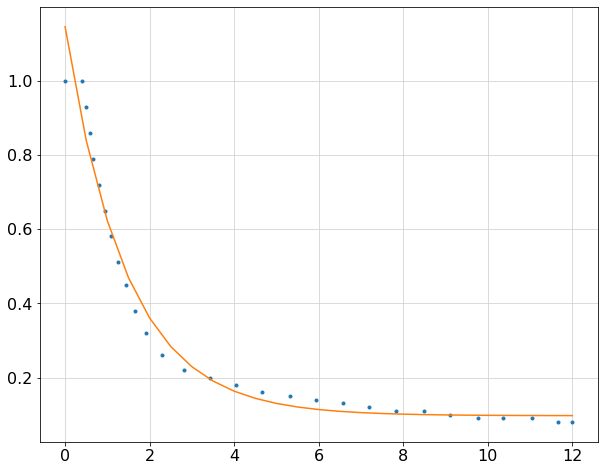

In [16]:
def line(x,a,b,c):
    y = a*np.exp(-b*x) + c
    return y

p, pcov = curve_fit(line,DataPoints_x,DataPoints_y)
a,b,c = p

def fit_eq(x):
    y = a*np.exp(-b*x) + c
    return y

x = np.linspace(0,12,25)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b,c)

### 2nd part Eq

1.1646195036575344 0.5801811021520759


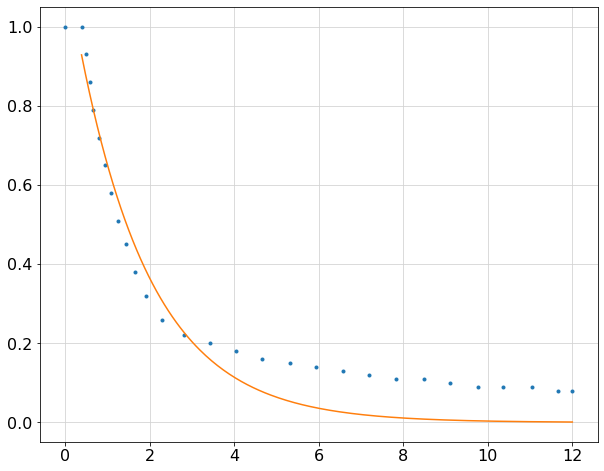

In [17]:
def line(x,a,b):
    y = a*np.exp(-b*x)
    return y

p, pcov = curve_fit(line,DataPoints_x[1:],DataPoints_y[1:])
a,b = p

def fit_eq(x):
    y = a*np.exp(-b*x)
    return y

x = np.linspace(min(DataPoints_x[1:]),max(DataPoints_x[1:]),250)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b)

0.43446159809369017 0.08092456220870248


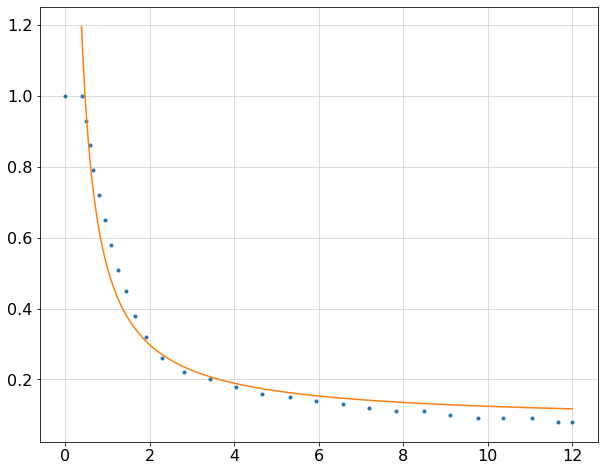

In [18]:
def line(x,a,b):
    y = (a/x)+b
    return y

p, pcov = curve_fit(line,DataPoints_x[1:],DataPoints_y[1:])
a,b = p

def fit_eq(x):
    y = (a/x)+b
    return y

x = np.linspace(min(DataPoints_x[1:]),max(DataPoints_x[1:]),250)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b)

0.75864116988843 -0.17000486310874907


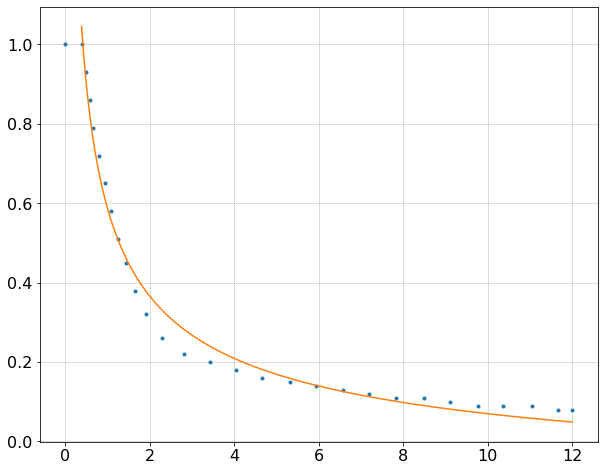

In [19]:
def line(x,a,b):
    y = a/np.sqrt(x) +b
    return y

p, pcov = curve_fit(line,DataPoints_x[1:],DataPoints_y[1:])
a,b = p

def fit_eq(x):
    y = a/np.sqrt(x) +b
    return y

x = np.linspace(min(DataPoints_x[1:]),max(DataPoints_x[1:]),250)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b)

-0.2607492205012052 1.2796555864316834 1.3454092772161599 0.6120199363564823 -0.07286917792845513
0.08207678244520344


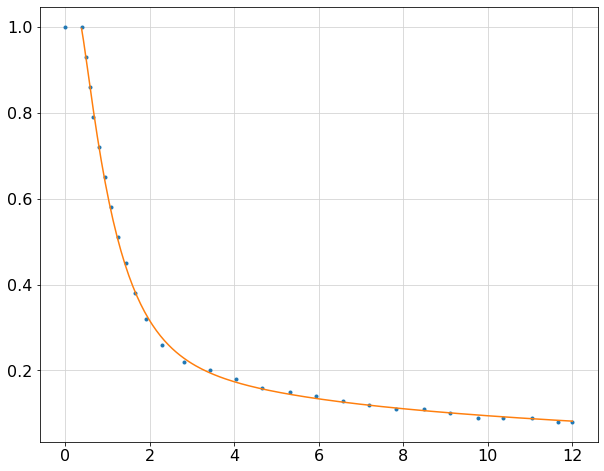

In [20]:
def line(x,a,b,c,d,e):
    y = (a/x) + b*np.exp(-c*x) + d/np.sqrt(x) + e
    return y

p, pcov = curve_fit(line,DataPoints_x[1:],DataPoints_y[1:])
a,b,c,d,e = p

def fit_eq(x):
    y =  (a/x) + b*np.exp(-c*x) + d/np.sqrt(x) +e
    return y

x = np.linspace(min(DataPoints_x[1:]),max(DataPoints_x[1:]),250)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b,c,d,e)
print(fit_eq(12))

## Piecewise Attempt

In [21]:
def p(x,a,b,c,d,e,x0,x1):
    conds = [x<x0, (x>=x0) & (x<x1),x>=x1]
    funcs = [1,lambda x:(a/x) + b*np.exp(-c*x) + d/np.sqrt(x) + e, (a/x1) + b*np.exp(-c*x1) + d/np.sqrt(x1)
             + e]
    return np.piecewise(x,condlist=conds,funclist=funcs)

In [22]:
# x = np.linspace(0,12,500)

# for i in x:
#     print(i, p(i,-0.261,1.280,1.345,0.612,-0.073,0.39,12))

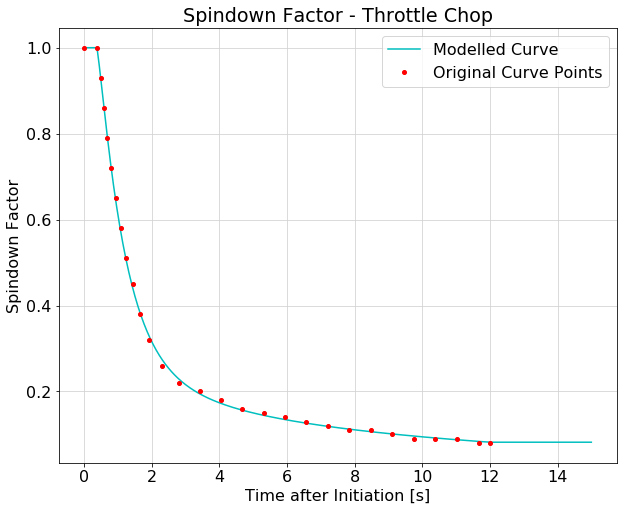

In [23]:
x = np.linspace(0,15,500)
plt.plot(x,p(x,-0.261,1.280,1.345,0.612,-0.073,0.39,12),'c',label = 'Modelled Curve')
plt.plot(DataPoints_x,DataPoints_y,'r.',markersize =8,label='Original Curve Points')

plt.title('Spindown Factor - Throttle Chop')
plt.xlabel('Time after Initiation [s]')
plt.ylabel('Spindown Factor')
plt.legend()

In [12]:
p(12.0,-0.261,1.280,1.345,0.612,-0.073,0.39,12)

array(0.08191931)